# Time Series Forcasting

primary resource: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

### Required Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Loading Dataset

In [28]:
jobs_df = pd.read_excel('data (40)_updatedV1.xlsx') #contains all the entries
jobs_df.start_time = pd.to_datetime(jobs_df['start_time'])
jobs_df = jobs_df.dropna(subset = ['start_time'])
dfques3 = jobs_df[['start_time','workers_required']].copy()
dfques3 = dfques3.groupby(['start_time']).sum()
dfques3.head()

,workers_required
start_time,
2015-10-25 17:00:00,3
2015-10-31 18:30:00,5
2015-10-31 22:00:00,3
2015-11-05 18:00:00,5
2015-11-09 16:00:00,1


In [29]:
dfques3.index

DatetimeIndex(['2015-10-25 17:00:00', '2015-10-31 18:30:00',
               '2015-10-31 22:00:00', '2015-11-05 18:00:00',
               '2015-11-09 16:00:00', '2015-11-09 17:30:00',
               '2015-11-14 18:00:00', '2015-11-17 11:30:00',
               '2015-11-17 13:00:00', '2015-11-19 15:00:00',
               ...
               '2019-11-02 12:00:00', '2019-11-09 12:00:00',
               '2019-11-30 03:00:00', '2019-12-01 08:00:00',
               '2019-12-29 12:00:00', '2019-12-31 14:00:00',
               '2020-01-01 08:00:00', '2020-01-16 08:00:00',
               '2020-01-25 08:00:00', '2026-12-03 08:00:00'],
              dtype='datetime64[ns]', name=u'start_time', length=40879, freq=None)

In [30]:
#clear last entry which includes 2026
#dfques3.drop(dfques3.tail(1).index,inplace=True) # drop last 1 row
#dfques3.index

### Check Stationarity of Time Series
A time series (TS) is said to be stationary if its observations are not dependent on time. Summary statistics calculated on the TS are  consistent over time, its statistical properties include the mean,  variance and autocovariance.

Importance:
1. Most TS models work on the assumption that the TS is stationary.
2. Theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

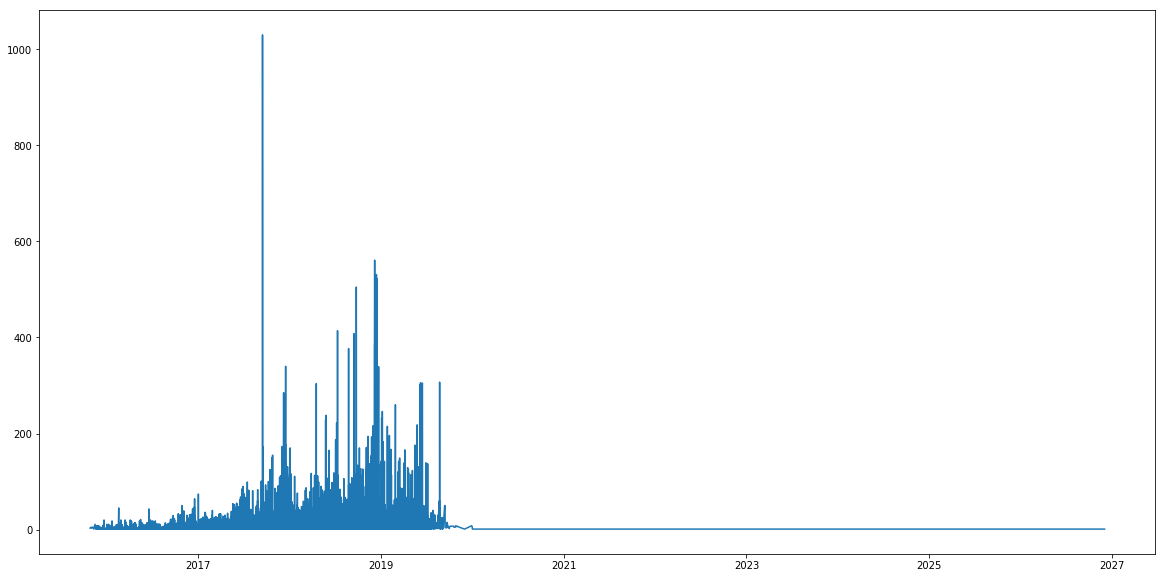

In [31]:
plt.plot(dfques3)

Matt 290619: Notice that there isn't an overall increasing trend in the data.

Check stationarity using Plotting Rolling Statistics along with the Dickey-Fuller Test. Notice that standard deviation is plotted instead of variance to keep the unit similar to mean.

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window="30D",center=False).mean()
    rolstd = timeseries.rolling(window="30D",center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.unstack(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

rolling window is set to 30 days/1 month

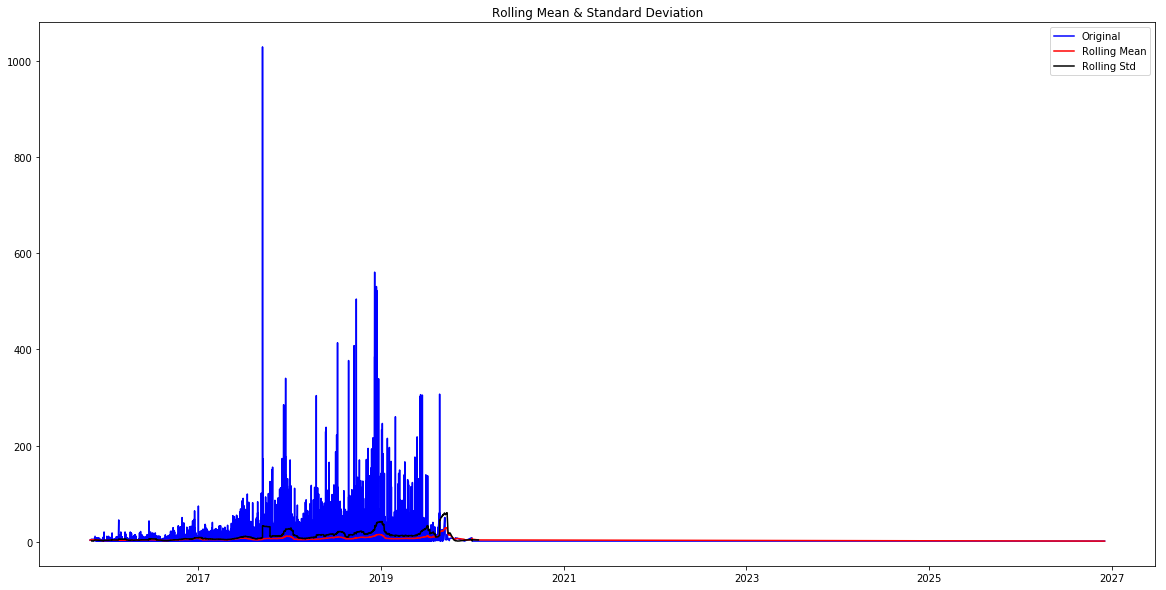

Results of Dickey-Fuller Test:
Test Statistic                -1.799621e+01
p-value                        2.743873e-30
#Lags Used                     5.400000e+01
Number of Observations Used    4.082400e+04
Critical Value (5%)           -2.861611e+00
Critical Value (1%)           -3.430510e+00
Critical Value (10%)          -2.566808e+00
dtype: float64


In [33]:
test_stationarity(dfques3)

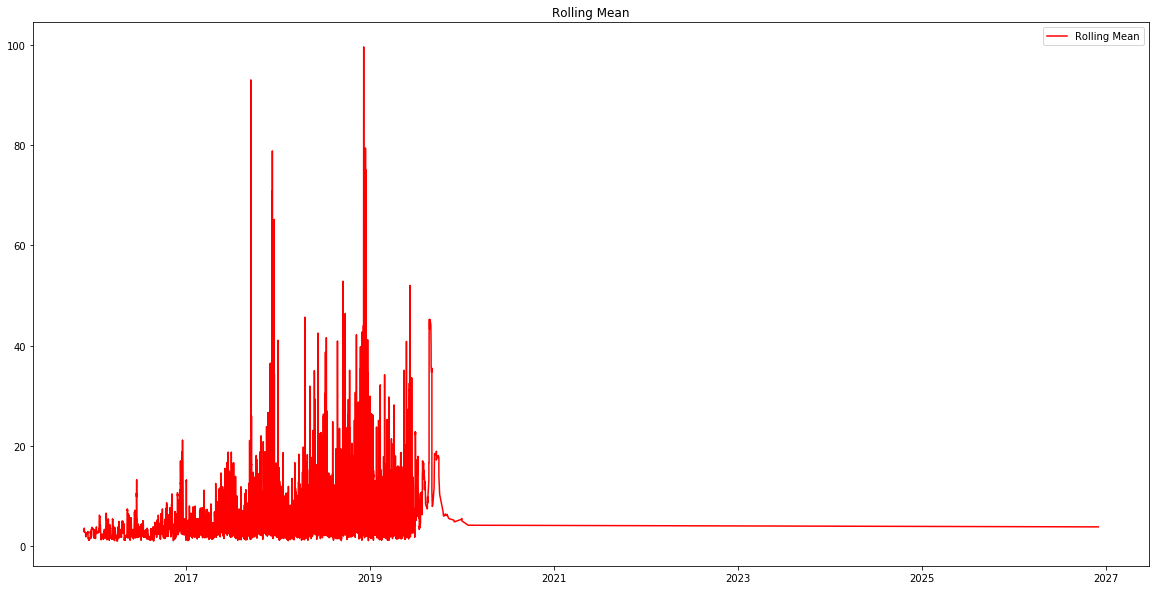

In [34]:
def mean(timeseries):
    rolmean = timeseries.rolling(window=12,center=False).mean()
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
mean(dfques3)

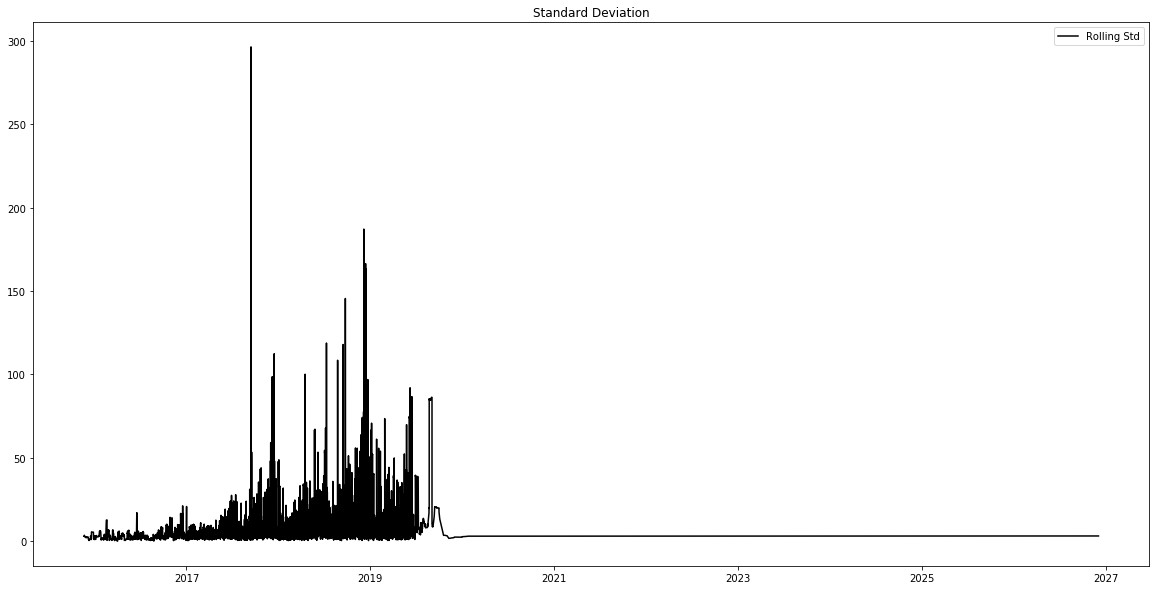

In [35]:
def std(timeseries):
    rolstd = timeseries.rolling(window=12,center=False).std()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Standard Deviation')
    plt.show(block=False)
    
std(dfques3)

Matt 290619: Notice that there are variations for both the standard deviation and the mean, this is not a stationary series.


However, the test statistic is way smaller than the critical values. (The signed values are compared, not the absolute values.)

### Making Time Series Stationary
Main reasons behind non-stationarity of a TS: Trend and Seasonality.

Estimating & Elimination Trend: reduce trend by transformation (incl. aggregation, smoothing/moving average or polynomial fitting) and can be further done through differencing or decomposition (modelling both trend and seasonality and removing them from the model).

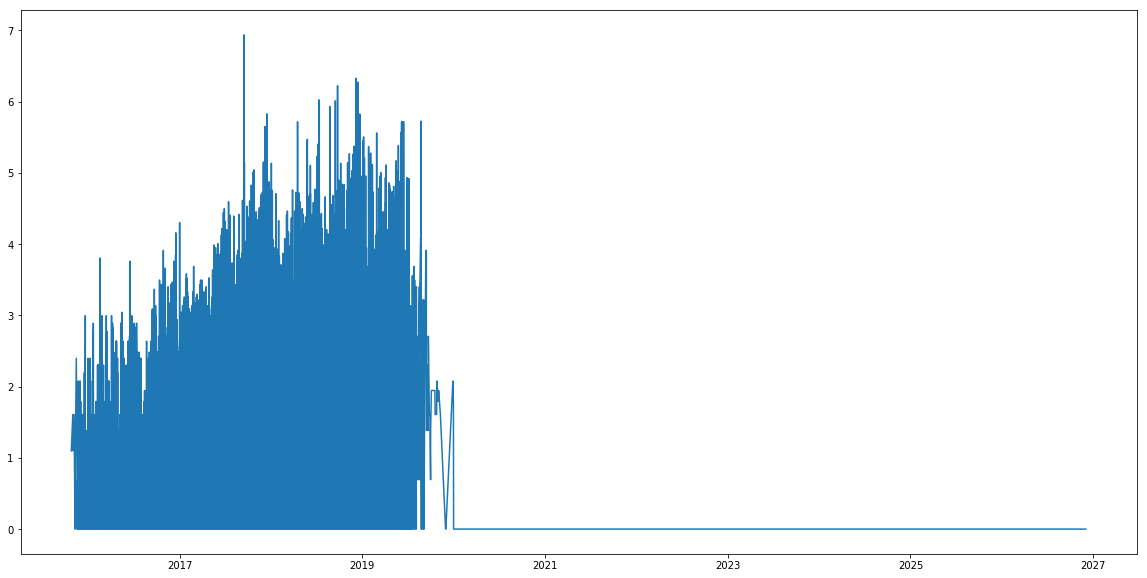

In [36]:
ts_log = np.log(dfques3) #log transformation
plt.plot(ts_log)

In [37]:
print(ts_log)

                         workers_required
start_time                               
2015-10-25 17:00:00.000          1.098612
2015-10-31 18:30:00.000          1.609438
2015-10-31 22:00:00.000          1.098612
2015-11-05 18:00:00.000          1.609438
2015-11-09 16:00:00.000          0.000000
2015-11-09 17:30:00.000          0.693147
2015-11-14 18:00:00.000          2.397895
2015-11-17 11:30:00.000          0.693147
2015-11-17 13:00:00.000          0.000000
2015-11-19 15:00:00.000          0.000000
2015-11-19 17:00:00.000          0.693147
2015-11-20 17:00:00.000          0.000000
2015-11-20 17:30:00.000          0.000000
2015-11-21 12:00:00.000          1.791759
2015-11-21 17:00:00.000          0.693147
2015-11-21 18:30:00.000          1.945910
2015-11-21 19:00:00.000          0.000000
2015-11-22 16:45:00.000          2.079442
2015-11-23 10:30:00.000          0.693147
2015-11-23 17:30:00.000          0.000000
2015-11-24 11:30:00.000          0.000000
2015-11-24 18:00:00.000          0

In [38]:
ts_log_2 = ts_log.replace([np.inf, -np.inf], np.nan)
ts_log_2.dropna(inplace=True)

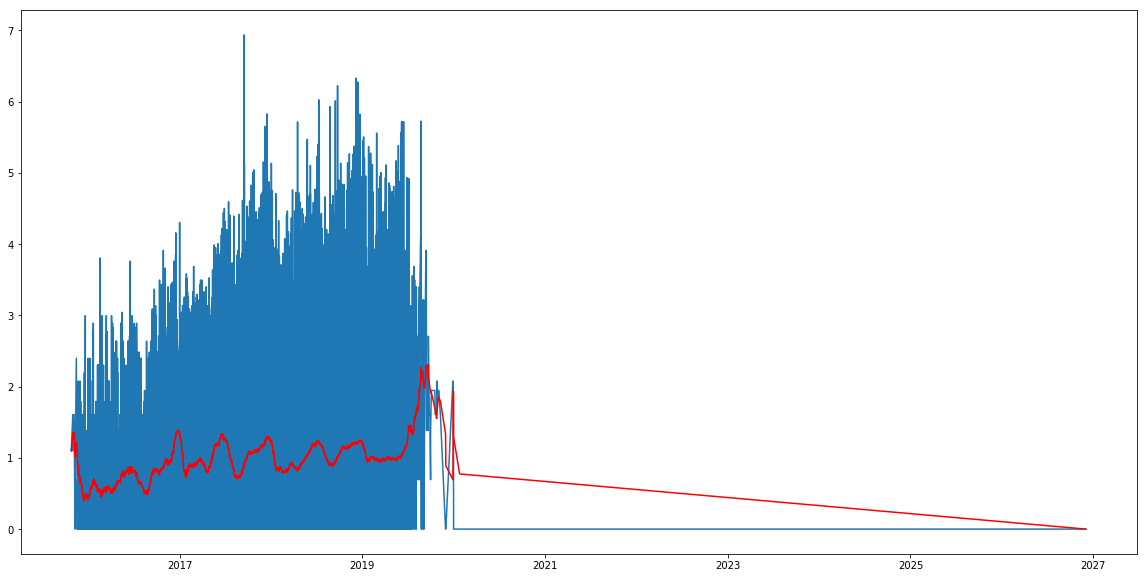

In [39]:
#moving average approach:
#taking 'k' consecutive values depending on the frequency of time series.

moving_avg = ts_log_2.rolling("30D").mean() #30D for 1month
plt.plot(ts_log_2)
plt.plot(moving_avg, color='red')

In [40]:
ts_log_moving_avg_diff = ts_log_2 - moving_avg
ts_log_moving_avg_diff.head(12)

,workers_required
start_time,
2015-10-25 17:00:00,0.000000
2015-10-31 18:30:00,0.255413
2015-10-31 22:00:00,-0.170275
2015-11-05 18:00:00,0.255413
2015-11-09 16:00:00,-1.083220
2015-11-09 17:30:00,-0.325061
2015-11-14 18:00:00,1.182589
2015-11-17 11:30:00,-0.456889
2015-11-17 13:00:00,-1.022254


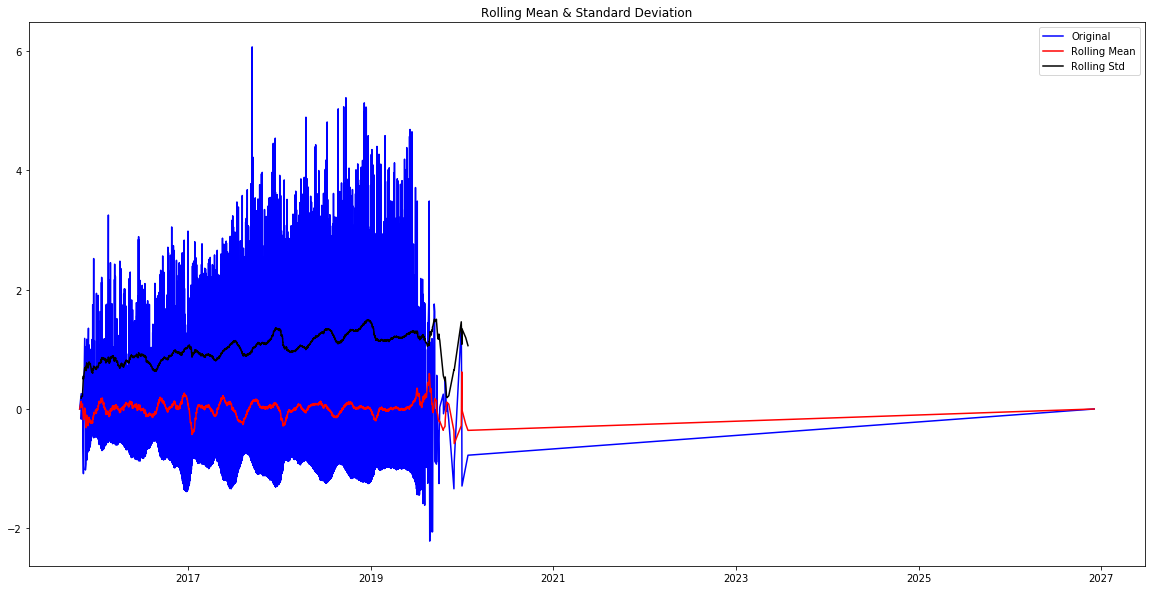

Results of Dickey-Fuller Test:
Test Statistic                   -20.909876
p-value                            0.000000
#Lags Used                        54.000000
Number of Observations Used    40824.000000
Critical Value (5%)               -2.861611
Critical Value (1%)               -3.430510
Critical Value (10%)              -2.566808
dtype: float64


In [41]:
ts_log_moving_avg_diff = ts_log_moving_avg_diff.replace([np.inf, -np.inf], np.nan)
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Matt 290619: the rolling values appear to be varying but with no specific trend while the test statistis is still smaller than the 1% critical value, so we can say with 99% confidence that this is a stationary series.

### Eliminating Trend and Seasonality
Decomposition cannot be applied as residual becomes zero, if freq is set to 1, because seasonality is a copy of observed. Frequency needed cannot be determined as dataset has inconsistent time intervals.

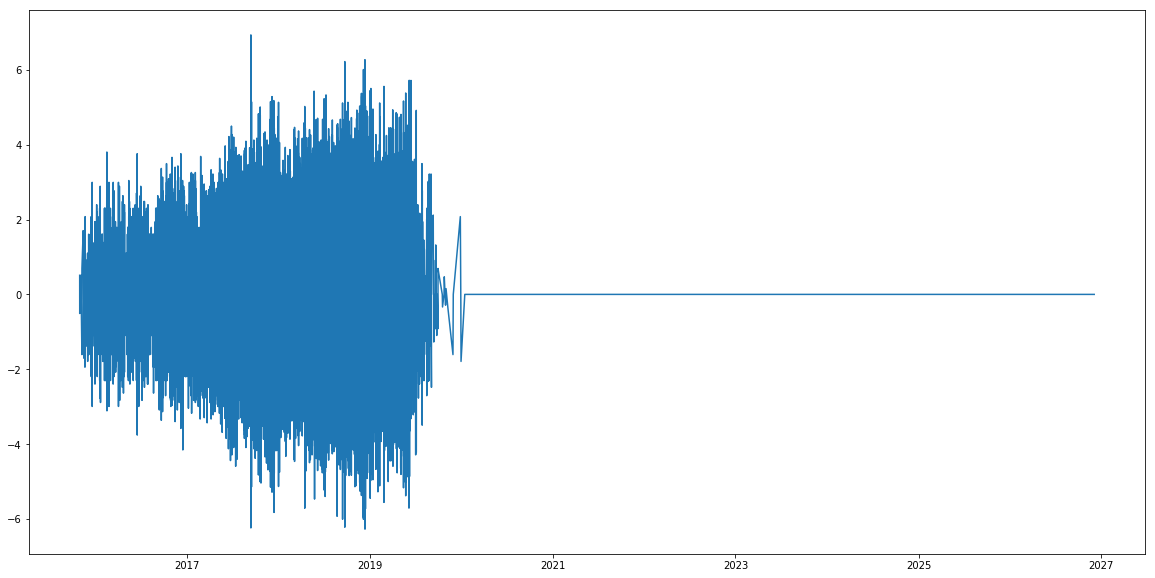

In [42]:
ts_log_diff = ts_log_2 - ts_log_2.shift()
plt.plot(ts_log_diff)

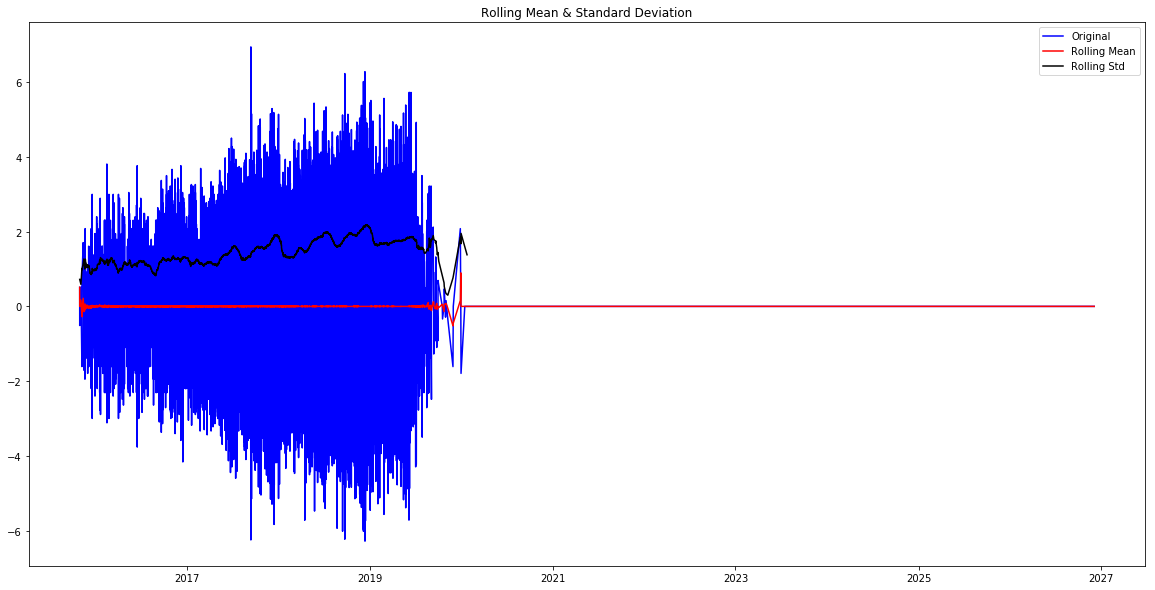

Results of Dickey-Fuller Test:
Test Statistic                   -47.557984
p-value                            0.000000
#Lags Used                        54.000000
Number of Observations Used    40823.000000
Critical Value (5%)               -2.861611
Critical Value (1%)               -3.430510
Critical Value (10%)              -2.566808
dtype: float64


In [43]:
ts_log_diff = ts_log_diff.replace([np.inf, -np.inf], np.nan)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Forecasting a Time Series

We need to use a statistical model like Auto-Regressive Integrated Moving Averages (ARIMA) to forecast the data as series might have significant dependence among values, such as repeated customers or events.

For a stationary time series, ARIMA forecasting is a linear equation where the predictors depend on the parameters (p,d,q) of the model.
1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.\

Values of p and q are determined through:
1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [44]:
#ACF and PACF plots for TS
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

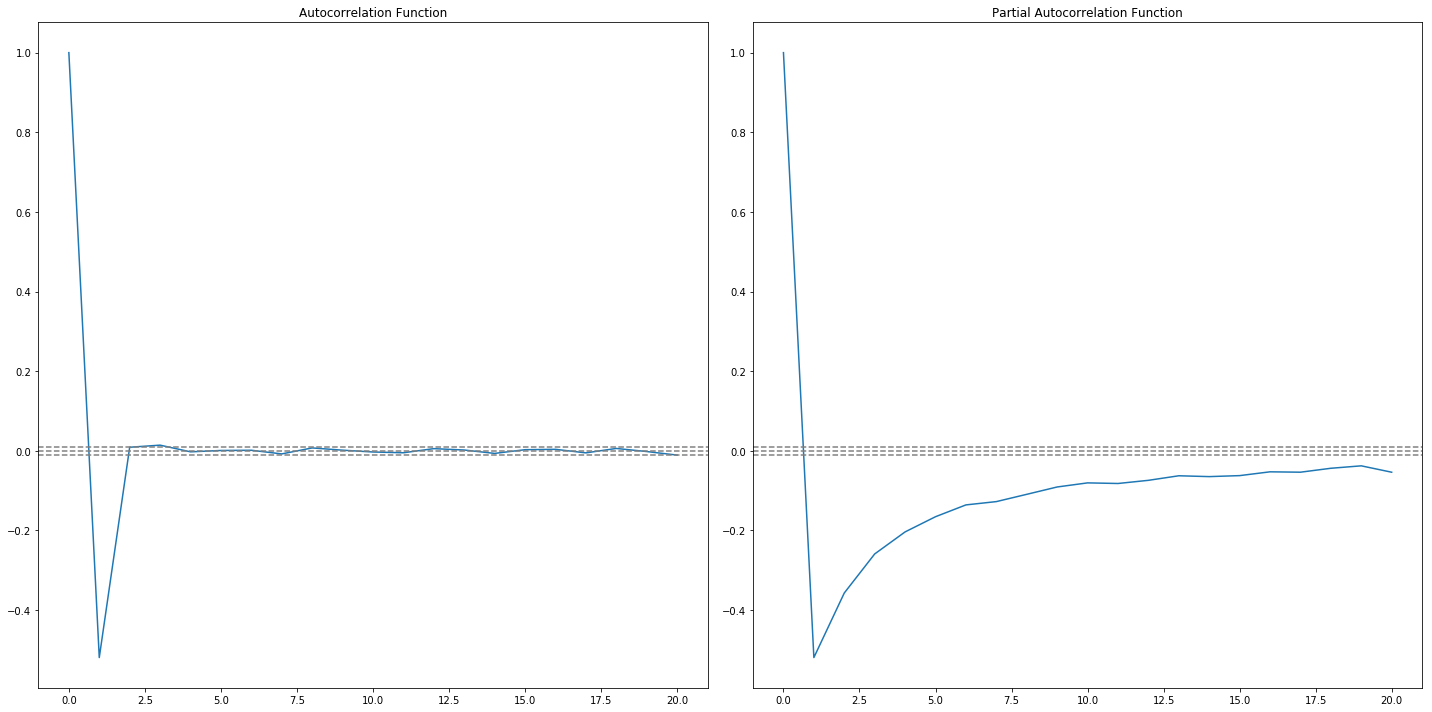

In [45]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p = 1 from PACF and q = 1 from ACF

In [46]:
from statsmodels.tsa.arima_model import ARIMA

/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


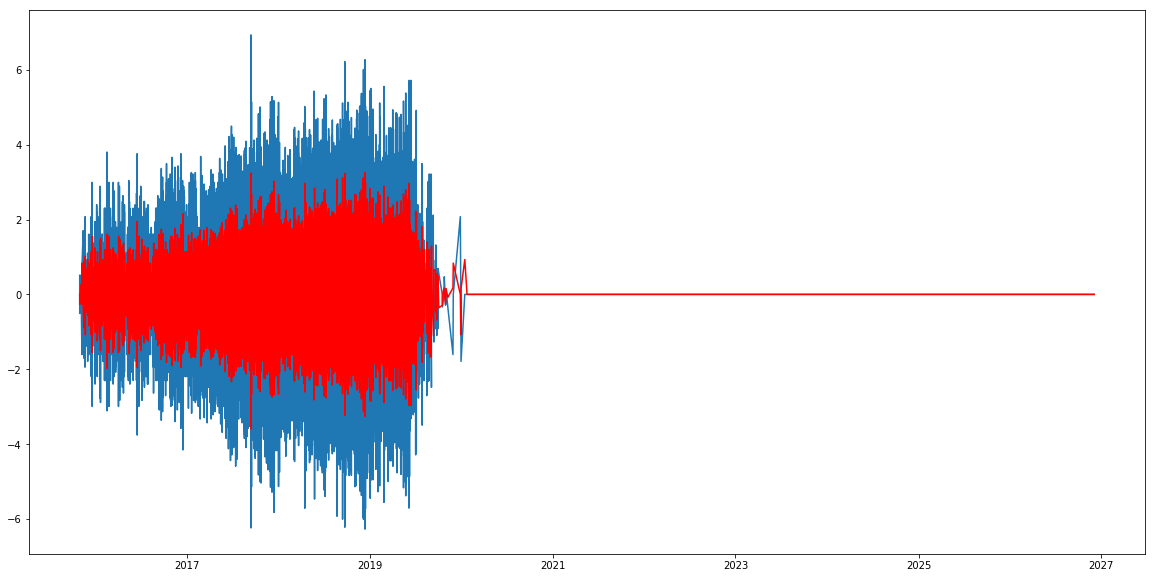

In [47]:
# AR
model = ARIMA(ts_log_2, order=(1, 1, 0))
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


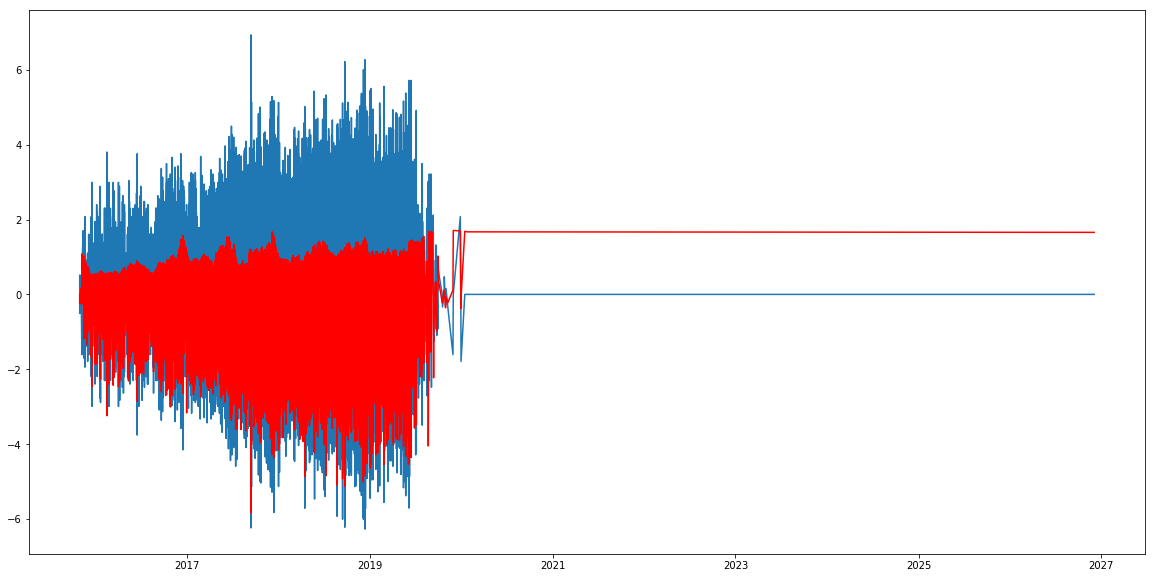

In [48]:
## MA
model = ARIMA(ts_log_2,order=(0,1,1))
result_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_MA.fittedvalues,color='red')
#plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-ts_log_dif**2)))

/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


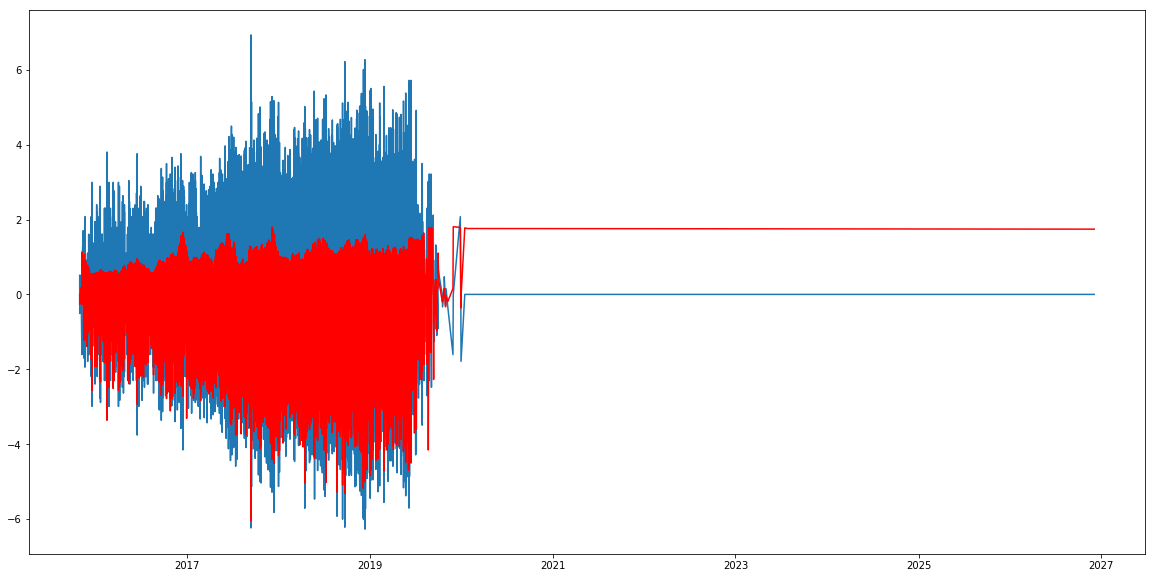

In [49]:
## ARIMA
model = ARIMA(ts_log_2, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Can't do calculations for the RSS as the time scale does not have a fixed frequency.

### Taking it back to original scale

In [50]:
# using combined model because it seemed to give the best results

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

start_time
2015-10-31 18:30:00    0.000027
2015-10-31 22:00:00   -0.264804
2015-11-05 18:00:00    0.180921
2015-11-09 16:00:00   -0.264765
2015-11-09 17:30:00    1.131236
dtype: float64


Notice that it starts from 2015-10-31 and not the first day, this is because a lag of 1 was taken and the first element doesn't have anything before it to subtract from.

In [51]:
# convert the differencing to log scale by adding these differences
# consecutively to the base number,
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log = pd.Series(ts_log_2.ix[0], index=ts_log_2.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

start_time
2015-10-31 18:30:00    0.000027
2015-10-31 22:00:00   -0.264777
2015-11-05 18:00:00   -0.083857
2015-11-09 16:00:00   -0.348621
2015-11-09 17:30:00    0.782615
dtype: float64


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


start_time
2015-10-25 17:00:00         NaN
2015-10-31 18:30:00    0.000027
2015-10-31 22:00:00   -0.264777
2015-11-05 18:00:00   -0.083857
2015-11-09 16:00:00   -0.348621
dtype: float64

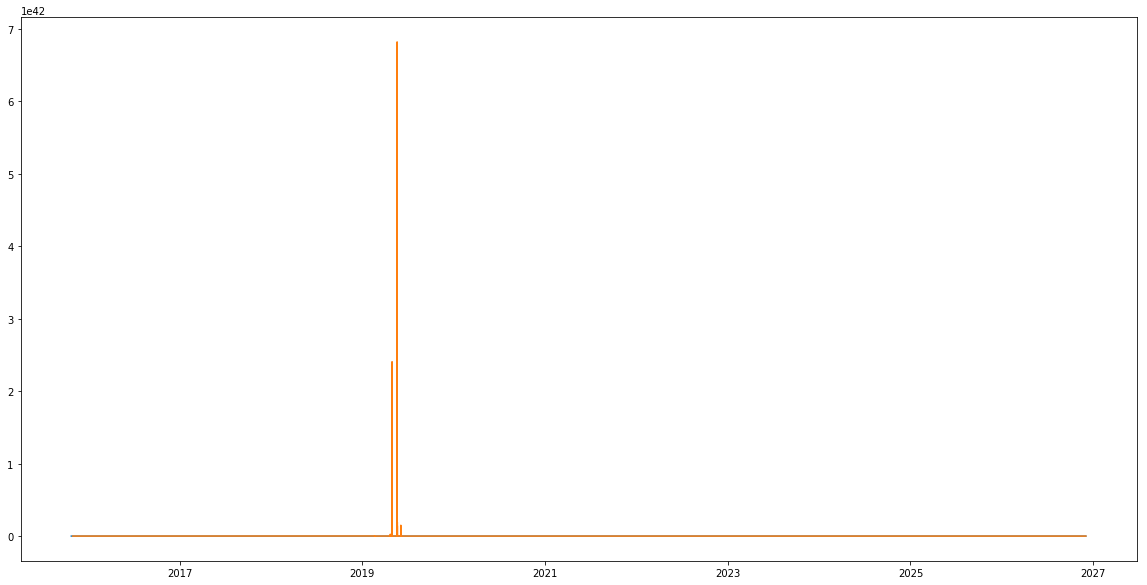

In [52]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dfques3)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))